## Author: Technocolabs Sofwares
## Credit: Mahmoud Yaser Salman
## Programmed: Spotify Recommendation System Project 

<hr>

<center> <h1> Feature Engineering and Clustering Recommendation </h1> </center>

<hr>

## Import Packages

In [59]:
import pandas as pd
# Import Pandas to use DataFrames
import swifter
# To efficiently apply any function to a Pandas Data Frame or Series object in the quickest available method
import numpy as np
# Import Numpy which will hel in mathematical calculations 
import matplotlib.pyplot as plt
import seaborn as sns
# To Visualize Data
import os
# To Access system files/options
import glob
# To return all file paths that match a specific pattern
from tqdm import tqdm
# To Display progress when using loops


import statsmodels
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from scipy import stats
from sklearn import preprocessing
from sklearn.cluster import KMeans


pd.set_option('display.max_columns', None)
pd.set_option("display.precision", 2)
# Tune some options in pandas 


%matplotlib inline
# To make any plot appear in jupyter notebook

## Import our dataset

In [60]:
DATASETS_PATH = 'A:\Spotify Data\JsonData' # change to the path of your csv file
df_main = pd.read_csv(os.path.join(DATASETS_PATH, 'feature_engineering_dataset.csv'))

In [61]:
df_main.head()

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,collaborative,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,0,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,0,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,0,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,0,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.9,0.81,4,-7.11,0,0.12,0.03,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21


# Create New Features by Features Interaction

**I conducted sentiment analysis finding the polarity and subjectivity of the track name.**

- Subjectivity (0,1): The amount of personal opinion and factual information contained in the text.
- Polarity (-1,1): The degree of strong or clearly defined sentiment accounting for negation.
    
"The goal of the sentiment analysis is to extract additional features from the tracks.
By doing so, we can extract sentiment data other audio features via textual information.
For example, if the general mood of the song titles of a playlist is positive,
then this can be utilized to recommend positive songs. However, due to the short length of the titles,
the two metrics cannot produce optimal results."

In [62]:
df_add = df_main.copy()

## One Hot Encoding Manually  

In [63]:
happy_yes = df_add['valence'].copy()
happy_yes[df_add['valence']>=0.5] = 1
happy_yes[df_add['valence']<0.5] = 0
happy_yes.name = "happy_yes"
happy_yes

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    0.0
Name: happy_yes, Length: 266363, dtype: float64

In [64]:
happy_no = df_add['valence'].copy()
happy_no[df_add['valence'] >= 0.5] = 0
happy_no[df_add['valence'] < 0.5] = 1
happy_no.name = "happy_no"
happy_no

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
266358    0.0
266359    0.0
266360    0.0
266361    0.0
266362    1.0
Name: happy_no, Length: 266363, dtype: float64

In [65]:
speech_yes = df_add['speechiness'].copy()
speech_yes.name = "speech_yes"
speech_yes[(df_add['speechiness']>=0.66)] = 1
speech_yes[(df_add['speechiness']<0.66)] = 0
speech_yes

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
266358    0.0
266359    0.0
266360    0.0
266361    0.0
266362    0.0
Name: speech_yes, Length: 266363, dtype: float64

In [66]:
speech_no = df_add['speechiness'].copy()
speech_no.name = "speech_no"
speech_no[(df_add['speechiness']>=0.66)] = 0
speech_no[(df_add['speechiness']<0.66)] = 1
speech_no

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
266358    1.0
266359    1.0
266360    1.0
266361    1.0
266362    1.0
Name: speech_no, Length: 266363, dtype: float64

In [67]:
collaborative_yes = df_add['collaborative'].copy()
collaborative_yes.name = "collaborative_yes"
collaborative_yes[(df_add['collaborative'] == 1)] = 1
collaborative_yes[(df_add['collaborative'] == 0)] = 0
collaborative_yes

0         0
1         0
2         0
3         0
4         0
         ..
266358    0
266359    0
266360    0
266361    0
266362    0
Name: collaborative_yes, Length: 266363, dtype: int64

In [68]:
collaborative_no = df_add['collaborative'].copy()
collaborative_no.name = "collaborative_no"
collaborative_no[(df_add['collaborative'] == 1)] = 0
collaborative_no[(df_add['collaborative'] == 0)] = 1
collaborative_no

0         1
1         1
2         1
3         1
4         1
         ..
266358    1
266359    1
266360    1
266361    1
266362    1
Name: collaborative_no, Length: 266363, dtype: int64

In [69]:
mode_yes = df_add['mode'].copy()
mode_yes.name = "mode_yes"
mode_yes[(df_add['mode']>=0.66)] = 1
mode_yes[(df_add['mode']<0.66)] = 0
mode_yes

0         0
1         0
2         0
3         0
4         0
         ..
266358    1
266359    1
266360    1
266361    1
266362    1
Name: mode_yes, Length: 266363, dtype: int64

In [70]:
mode_no = df_add['mode'].copy()
mode_no.name = "mode_no"
mode_no[(df_add['mode'] == 1)] = 0
mode_no[(df_add['mode'] == 0)] = 1
mode_no

0         1
1         1
2         1
3         1
4         1
         ..
266358    0
266359    0
266360    0
266361    0
266362    0
Name: mode_no, Length: 266363, dtype: int64

In [71]:
# We have to drop original boolean columns
df_add = df_add.drop(columns = ["collaborative", "mode"], axis = 1)
# Add all the newly created columns by ONE HOT ENCODING technique to our dataframe
df_add = pd.concat([df_add, mode_no, mode_yes, collaborative_no, collaborative_yes, speech_no, speech_yes, happy_no, happy_yes], axis=1)
df_add

,pid,name,description,modified_at,num_artists,num_albums,num_tracks,num_followers,num_edits,playlist_duration_ms,pos,artist_name,track_uri,artist_uri,track_name,album_uri,duration_ms,album_name,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,uri,track_href,analysis_url,time_signature,playlist_followers_artist,playlist_followers_album,playlist_followers_track,mode_no,mode_yes,collaborative_no,collaborative_yes,speech_no,speech_yes,happy_no,happy_yes
0,0,Throwbacks,NaN,1493424000,37,47,52,1,6,11532414,0,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
1,123,w o r k o u t,NaN,1500681600,171,225,245,1,26,55676545,73,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
2,218,party playlist,NaN,1504310400,74,93,98,1,4,21299385,14,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
3,342,Dance mix,NaN,1473724800,111,127,167,1,15,43330767,42,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
4,382,spin,NaN,1505347200,13,14,14,2,5,3617477,1,Missy Elliott,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,Lose Control (feat. Ciara & Fat Man Scoop),spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,226863,The Cookbook,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,0UaMYEvWZi0ZqiDOoHU3YI,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,https://api.spotify.com/v1/tracks/0UaMYEvWZi0Z...,https://api.spotify.com/v1/audio-analysis/0UaM...,4,126,22,21,1,0,1,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266358,3999,other,NaN,1420848000,17,56,97,1,9,22548683,28,Jason Mraz,spotify:track:3ce7k1L4EkZppZPz1EJWTS,spotify:artist:4phGZZrJZRo4ElhRtViYdl,Living In The Moment,spotify:album:64SChsjQBiEe3aVTFYnW1b,235080,Love Is A Four Letter Word,0.65,0.63,7,-7.16,0.02,4.83e-02,0.00e+00,0.12,0.70,84.14,3ce7k1L4EkZppZPz1EJWTS,spotify:track:3ce7k1L4EkZppZPz1EJWTS,https://api.spotify.com/v1/tracks/3ce7k1L4EkZp...,https://api.spotify.com/v1/audio-analysis/3ce7...,4,248,79,1,0,1,1,0,1.0,0.0,0.0,1.0
266359,3999,other,NaN,1420848000,17,56,97,1,9,22548683,36,The Cure,spotify:track:6DW7MN6DCVvTDjtcL5IM9a,spotify:artist:7bu3H8JO7d0UbMoVzbo70s,Pictures Of You - Remix,spotify:album:3jRLyc2t1tExfVpdB88EUm,288106,Galore - The Singles 1987-1997,0.46,0.74,9,-6.10,0.03,4.48e-03,1.02e-02,0.12,0.63,172.72,6DW7MN6DCVvTDjtcL5IM9a,s

In [72]:
df_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266363 entries, 0 to 266362
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   pid                        266363 non-null  int64  
 1   name                       266363 non-null  object 
 2   description                5333 non-null    object 
 3   modified_at                266363 non-null  int64  
 4   num_artists                266363 non-null  int64  
 5   num_albums                 266363 non-null  int64  
 6   num_tracks                 266363 non-null  int64  
 7   num_followers              266363 non-null  int64  
 8   num_edits                  266363 non-null  int64  
 9   playlist_duration_ms       266363 non-null  int64  
 10  pos                        266363 non-null  int64  
 11  artist_name                266363 non-null  object 
 12  track_uri                  266363 non-null  object 
 13  artist_uri                 26

As our dataset have many **playlist features** and **track features**, then we can divide our major dataset into two minor datasets.

In [73]:
playlist = df_add[["pid", "name", "description", "playlist_duration_ms", "num_edits", "num_followers", "num_tracks", "num_albums", "num_artists", "modified_at", "collaborative_yes", "collaborative_no"]]
playlist = playlist.drop(playlist[playlist.duplicated()].index)

# Reset index for DataFrame
playlist = playlist.reset_index(drop=True)
playlist

,pid,name,description,playlist_duration_ms,num_edits,num_followers,num_tracks,num_albums,num_artists,modified_at,collaborative_yes,collaborative_no
0,0,Throwbacks,NaN,11532414,6,1,52,47,37,1493424000,0,1
1,123,w o r k o u t,NaN,55676545,26,1,245,225,171,1500681600,0,1
2,218,party playlist,NaN,21299385,4,1,98,93,74,1504310400,0,1
3,342,Dance mix,NaN,43330767,15,1,167,127,111,1473724800,0,1
4,382,spin,NaN,3617477,5,2,14,14,13,1505347200,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3239,potential,NaN,5619189,12,1,16,16,14,1365120000,0,1
3996,3315,Jethro Tull,NaN,12438266,6,1,35,15,5,1385683200,0,1
3997,3347,undertale,NaN,1341597,2,1,6,6,5,1503360000,0,1
3998,3442,Dark Roast Playlist,NaN,4480169,2,1,20,20,20,1413763200,0,1


In [74]:
track = df_add[["track_name","artist_name", "album_name", "duration_ms", "danceability", "energy", "key", "loudness", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "mode_no", "mode_yes", "speech_no", "speech_yes", "happy_no", "happy_yes"]]

# We will get popularity feature by the weights of some features which we engineered from our pre-feature engineering notebook
# In our pre-feature engineering notebook, we did EDA and noticed that some features have more variability than the others
# That is the reason of the multiplied weights to get our popularity feature  
track["popularity"] = (0.2*df_add["playlist_followers_track"])+(2*df_add["playlist_followers_artist"])+(1.5*df_add["playlist_followers_album"])

<ipython-input-74-d1ed836e1106>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  track["popularity"] = (0.2*df_add["playlist_followers_track"])+(2*df_add["playlist_followers_artist"])+(1.5*df_add["playlist_followers_album"])


In [75]:
# Drop duplicates
track = track.drop(track[track.duplicated()].index)

# Display first 5 rows
track.head()

,track_name,artist_name,album_name,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,mode_no,mode_yes,speech_no,speech_yes,happy_no,happy_yes,popularity
0,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,The Cookbook,226863,0.90,0.81,4,-7.11,0.12,3.11e-02,6.97e-03,0.05,0.81,125.46,1,0,1.0,0.0,0.0,1.0,289.2
21,Toxic,Britney Spears,In The Zone,198800,0.77,0.84,5,-3.91,0.11,2.49e-02,2.50e-02,0.24,0.92,143.04,1,0,1.0,0.0,0.0,1.0,617.5
68,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),235933,0.66,0.76,2,-6.58,0.21,2.38e-03,0.00e+00,0.06,0.70,99.26,1,0,1.0,0.0,0.0,1.0,2102.5
150,Rock Your Body,Justin Timberlake,Justified,267266,0.89,0.71,4,-6.05,0.14,2.01e-01,2.34e-04,0.05,0.82,100.97,1,0,1.0,0.0,0.0,1.0,945.3
183,It Wasn't Me,Shaggy,Hot Shot,227600,0.85,0.61,0,-4.60,0.07,5.61e-02,0.00e+00,0.31,0.65,94.76,0,1,1.0,0.0,0.0,1.0,544.7


In [76]:
track.shape[0]

93123

We notice that we have 93,123 unique tracks.

## Get all numerical columns

In [77]:
numerical_features = (track.dtypes == 'int64') | (track.dtypes == 'float64')
numerical_columns = []
for i in range(len(numerical_features)):
    if numerical_features[i]:
        numerical_columns.append(track.columns[i])
# Slicing to remove the boolean columns (As they have int data type)        
numerical_columns

['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'mode_no',
 'mode_yes',
 'speech_no',
 'speech_yes',
 'happy_no',
 'happy_yes',
 'popularity']

In [78]:
numerical_columns= ['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo','popularity']
numerical_columns

['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'popularity']

## Get all Boolean Columns

In [79]:
boolean_columns = ["mode_no", "mode_yes", "speech_no", "speech_yes", "happy_no", "happy_yes"]
boolean_columns

['mode_no', 'mode_yes', 'speech_no', 'speech_yes', 'happy_no', 'happy_yes']

## Get Right & Left Skewed Columns

In [80]:
right_skewed = []
left_skewed = []
for i in range(len(track[numerical_columns].columns)):
    if (track[numerical_columns].skew()[i]>0):
        right_skewed.append(track[numerical_columns].skew().index[i])
    else:
        left_skewed.append(track[numerical_columns].skew().index[i])
right_skewed

['duration_ms',
 'key',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'popularity']

## Feature Scaling

We standardize our data because it is an essential process before checking the correlation or performing PCA

In [81]:
numerical_columns

['duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'popularity']

In [82]:
# We will scale our data using standard scaler
scaler = preprocessing.StandardScaler()

# We notice that we exclude the loudness column because if if we try to standardize it, we will get many null values.
positive_numerical_columns = numerical_columns[0:4]+numerical_columns[5:]
df_scaled = pd.DataFrame(scaler.fit_transform(track[positive_numerical_columns]), columns = track[positive_numerical_columns].columns)
df_scaled

,duration_ms,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity
0,-1.01e-01,1.95,0.78,-0.35,0.33,-0.79,-0.38,-0.88,1.32,0.13,0.10
1,-3.83e-01,1.18,0.88,-0.07,0.26,-0.81,-0.31,0.24,1.78,0.74,0.76
2,-9.64e-03,0.52,0.54,-0.91,1.21,-0.88,-0.41,-0.81,0.89,-0.76,3.76
3,3.06e-01,1.88,0.35,-0.35,0.53,-0.23,-0.41,-0.86,1.35,-0.70,1.43
4,-9.35e-02,1.65,-0.11,-1.47,-0.17,-0.71,-0.41,0.65,0.70,-0.92,0.62
...,...,...,...,...,...,...,...,...,...,...,...
93118,-1.82e-02,0.44,-0.02,0.49,-0.65,-0.73,-0.41,-0.47,0.88,-1.28,0.76
93119,5.16e-01,-0.71,0.48,1.05,-0.57,-0.87,-0.37,-0.43,0.61,1.75,-0.16
93120,2.48e-01,0.81,0.22,1.61,-0.35,-0.72,-0.06,-0.79,1.18,-1.00,-0.16
93121,1.08e-01,0.88,0.25,1.05,-0.52,-0.40,1.05,-0.70,0.49,-0.94,1.56


## Label Encoding using SKLearn

We will perform label encoding to `artist_name` and `album_name` assuming they will add us useful information.

In [83]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'artist_name'.
df_scaled['artist_name'] = label_encoder.fit_transform(track['artist_name'])
  
# Encode labels in column 'album_name'.
df_scaled['album_name'] = label_encoder.fit_transform(track['album_name'])


df_scaled['artist_name'].unique()

array([13184,  2657,  2000, ..., 13736, 10801,   185])

## Drop Useless Features

In [84]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93123 entries, 0 to 93122
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       93123 non-null  float64
 1   danceability      93123 non-null  float64
 2   energy            93123 non-null  float64
 3   key               93123 non-null  float64
 4   speechiness       93123 non-null  float64
 5   acousticness      93123 non-null  float64
 6   instrumentalness  93123 non-null  float64
 7   liveness          93123 non-null  float64
 8   valence           93123 non-null  float64
 9   tempo             93123 non-null  float64
 10  popularity        93123 non-null  float64
 11  artist_name       93123 non-null  int32  
 12  album_name        93123 non-null  int32  
dtypes: float64(11), int32(2)
memory usage: 8.5 MB


In [85]:
# Again we concat our scaled data with the boolean ones
df_final = pd.concat([df_scaled, mode_no, mode_yes, speech_no, speech_yes, happy_no, happy_yes], axis=1)
df_final.drop(df_final[df_final["popularity"].isnull()].index, inplace = True)
df_final

,duration_ms,danceability,energy,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,artist_name,album_name,mode_no,mode_yes,speech_no,speech_yes,happy_no,happy_yes
0,-1.01e-01,1.95,0.78,-0.35,0.33,-0.79,-0.38,-0.88,1.32,0.13,0.10,13184.0,33942.0,1,0,1.0,0.0,0.0,1.0
1,-3.83e-01,1.18,0.88,-0.07,0.26,-0.81,-0.31,0.24,1.78,0.74,0.76,2657.0,17041.0,1,0,1.0,0.0,0.0,1.0
2,-9.64e-03,0.52,0.54,-0.91,1.21,-0.88,-0.41,-0.81,0.89,-0.76,3.76,2000.0,8393.0,1,0,1.0,0.0,0.0,1.0
3,3.06e-01,1.88,0.35,-0.35,0.53,-0.23,-0.41,-0.86,1.35,-0.70,1.43,9941.0,18157.0,1,0,1.0,0.0,0.0,1.0
4,-9.35e-02,1.65,-0.11,-1.47,-0.17,-0.71,-0.41,0.65,0.70,-0.92,0.62,16861.0,15659.0,1,0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93118,-1.82e-02,0.44,-0.02,0.49,-0.65,-0.73,-0.41,-0.47,0.88,-1.28,0.76,8933.0,20794.0,0,1,1.0,0.0,1.0,0.0
93119,5.16e-01,-0.71,0.48,1.05,-0.57,-0.87,-0.37,-0.43,0.61,1.75,-0.16,18784.0,12954.0,0,1,1.0,0.0,1.0,0.0
93120,2.48e-01,0.81,0.22,1.61,-0.35,-0.72,-0.06,-0.79,1.18,-1.00,-0.16,18784.0,22445.0,0,1,1.0,0.0,1.0,0.0
93121,1.08e-01,0.88,0.25,1.05,-0.52,-0.40,1.05,-0.70,0.49,-0.94,1.56,18784.0,13974.0,0,1,1.0,0.0,1.0,0.0


## Checking Correlation

We are checking correlation to get the most useful features by VALUE

<AxesSubplot:>

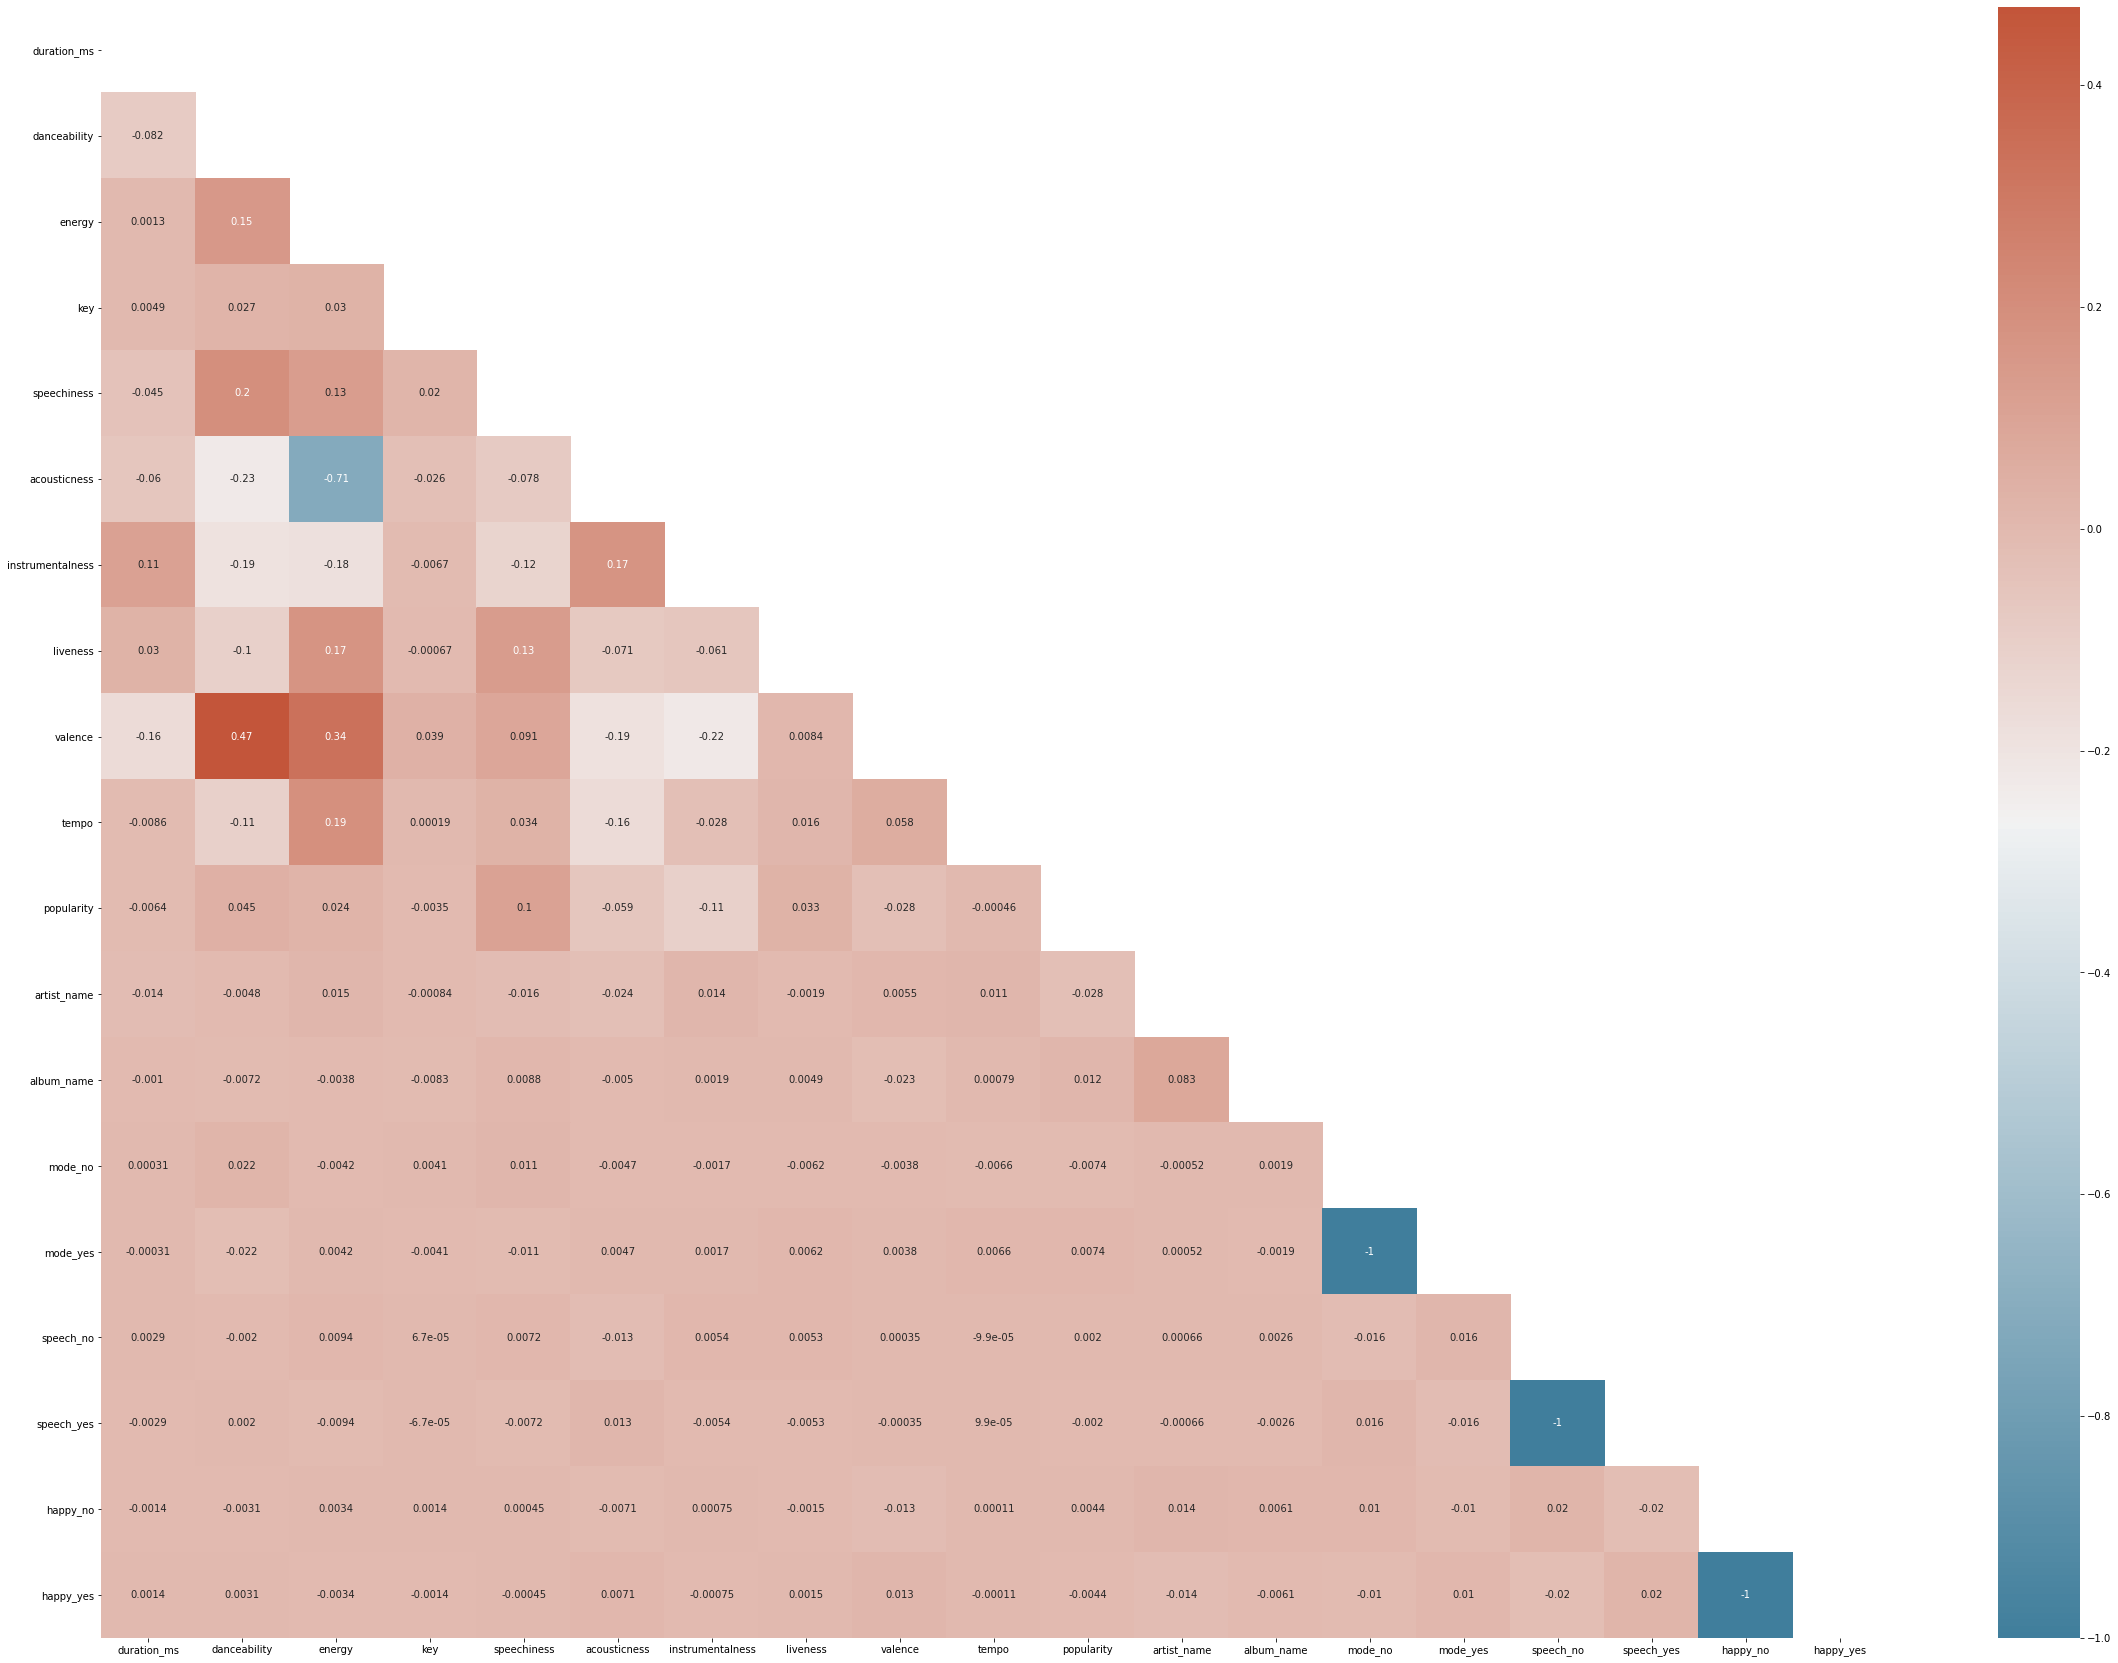

In [86]:
corr = df_final.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(40, 30))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [87]:
# A function to select the best features by checking their correlation. 
def manualFeatureSelection(features, r=0.1): 
    corrColumns = set()  # Set of all the names of correlated columns
    corr_matrix = features.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > r:  # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                corrColumns.add(colname)
    return list(corrColumns)

In [88]:
best_features = manualFeatureSelection(df_final)
df_best = df_final[best_features]
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93123 entries, 0 to 93122
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instrumentalness  93123 non-null  float64
 1   speech_yes        93123 non-null  float64
 2   valence           93123 non-null  float64
 3   mode_yes          93123 non-null  int64  
 4   liveness          93123 non-null  float64
 5   speechiness       93123 non-null  float64
 6   popularity        93123 non-null  float64
 7   tempo             93123 non-null  float64
 8   happy_yes         93123 non-null  float64
 9   acousticness      93123 non-null  float64
 10  energy            93123 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 8.5 MB


## Use PCA for Dimensionality Reduction

We are performing PCA to reduce our vector space and get the most useful NEW features

The cumulative variance of the first seven principal components is 0.94388


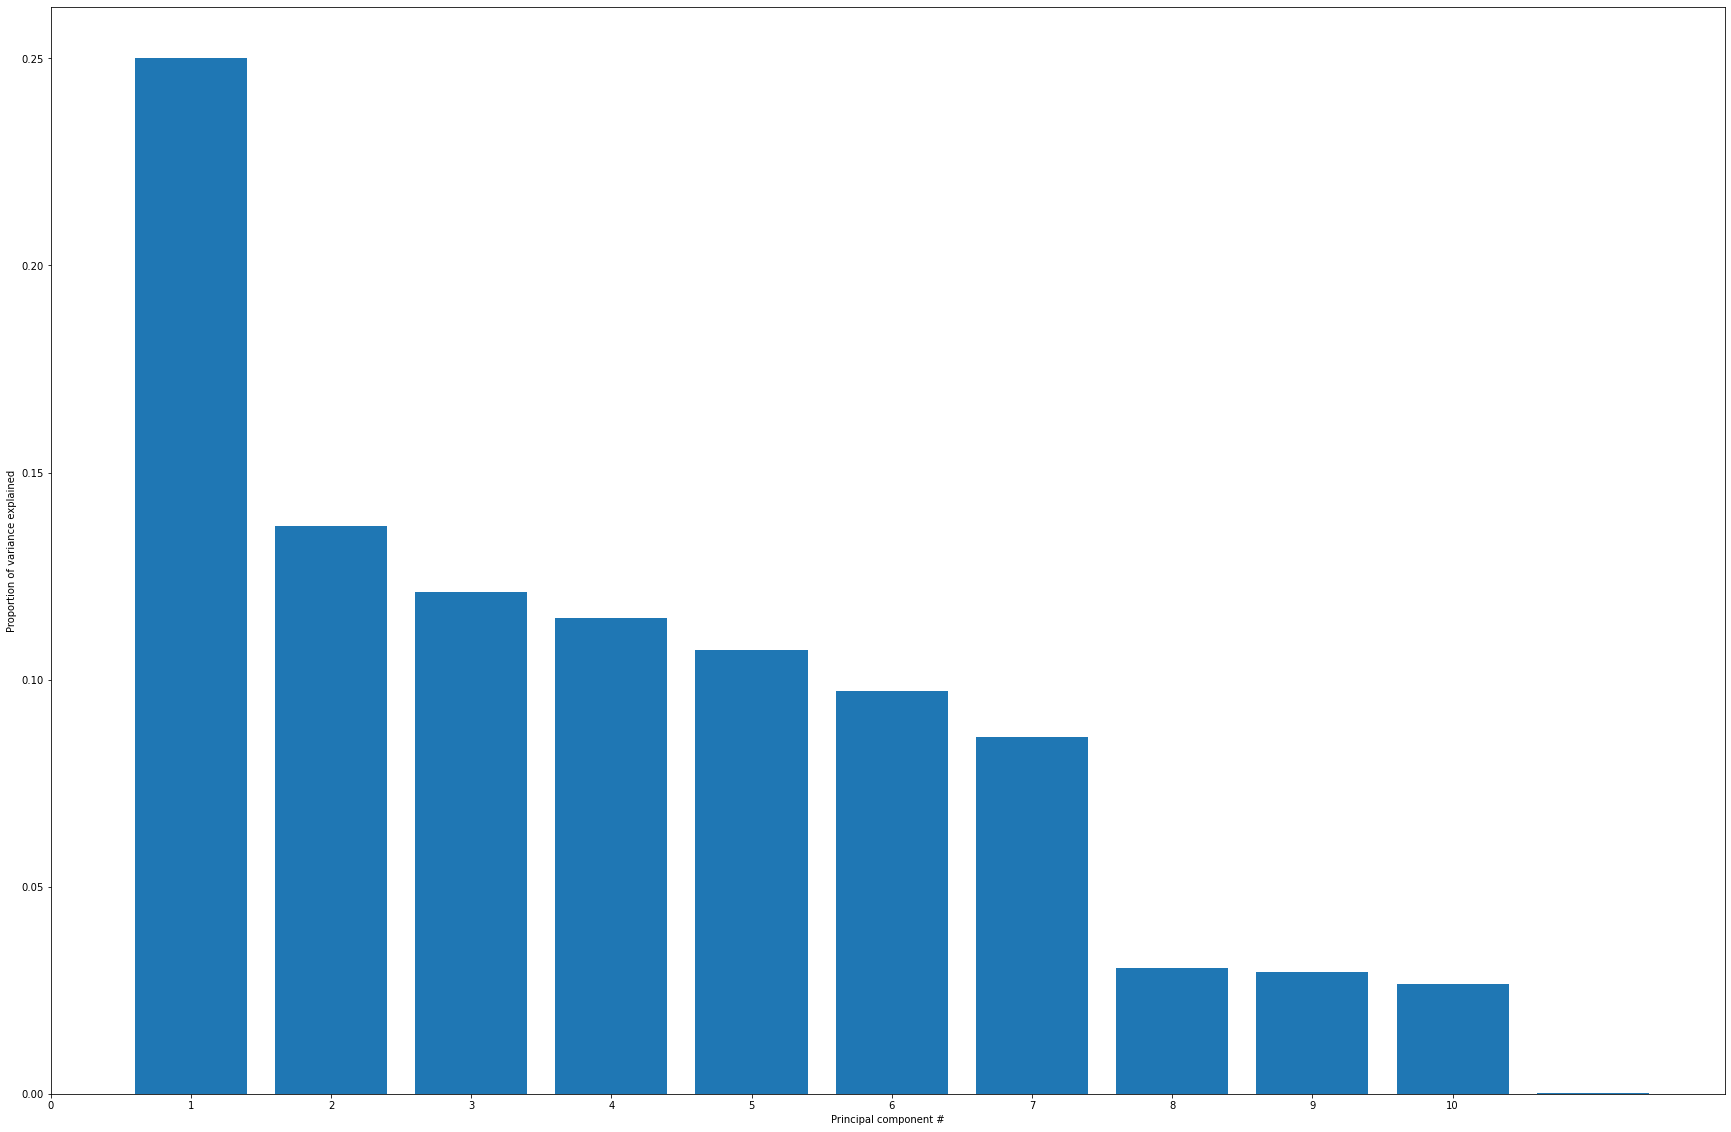

In [89]:
# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(df_best)

# Plot the proportion of variance explained on the y-axis of the bar plot
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 20))
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(df_best.shape[1]))

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[7]
print("The cumulative variance of the first seven principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

We notice that by reducing our features from 10 to 7 we get 94.3% of the variability of our data.

In [90]:
pca = PCA(n_components = 7)
X_pca = pca.fit_transform(df_best)
X_pca

array([[-1.43053955, -0.4075881 , -1.10477881, ...,  0.23608783,
         0.6058637 ,  0.33028845],
       [-2.01806529,  0.07780125, -0.43965651, ...,  0.34372206,
        -0.11344583,  1.18331445],
       [-1.50511511,  2.43545513, -1.03172942, ..., -1.05945322,
         1.20936221,  1.1789376 ],
       ...,
       [-0.52393764, -0.56460277, -1.37336056, ..., -0.73929972,
         0.57801168,  0.39133411],
       [ 0.07017372,  0.07000802, -0.42063672, ..., -1.42808822,
         0.85825173,  1.26607096],
       [-0.14418598,  0.31600209, -0.62403752, ..., -1.52416206,
         0.64278119, -0.7853579 ]])

In [91]:
component_names = [f"track_feature{i+1}" for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=component_names)
df_pca

,track_feature1,track_feature2,track_feature3,track_feature4,track_feature5,track_feature6,track_feature7
0,-1.43,-0.41,-1.10,0.28,0.24,0.61,0.33
1,-2.02,0.08,-0.44,0.30,0.34,-0.11,1.18
2,-1.51,2.44,-1.03,2.38,-1.06,1.21,1.18
3,-0.87,0.88,-1.49,0.73,-0.34,0.74,0.88
4,-0.63,0.68,-0.47,-0.33,-0.99,-0.24,0.42
...,...,...,...,...,...,...,...
93118,-0.40,0.15,-1.36,0.22,-1.35,0.09,0.43
93119,-1.27,-1.23,-0.01,0.87,0.83,-0.65,0.07
93120,-0.52,-0.56,-1.37,-0.26,-0.74,0.58,0.39
93121,0.07,0.07,-0.42,1.04,-1.43,0.86,1.27


## Recommendation Via Clustering

> - As according to this <a href = "https://audiophilereview.com/audiophile/how-many-music-genres-do-we-need/#:~:text=According%20to%20the%20Music%20Genre,337%20sub%20categories%20of%20music."> article </a> there are main **41** music genres <br>
    - Then we will go for 41 clusters

In [92]:
# Create a KMeans object with 41 clusters, use random_state=8 
km = KMeans(n_clusters=41,random_state=8)

# Fit the data to the `km` object
km=km.fit(df_pca)

# Create a new dataframe to make recommendations
df_recommend = track[["track_name", "artist_name", "album_name", "popularity"]]

# Create a new column with the labels from the KMeans clustering
df_recommend['cluster'] = km.labels_

<ipython-input-92-6c559d5a44d5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommend['cluster'] = km.labels_


In [93]:
df_recommend

,track_name,artist_name,album_name,popularity,cluster
0,Lose Control (feat. Ciara & Fat Man Scoop),Missy Elliott,The Cookbook,289.2,19
21,Toxic,Britney Spears,In The Zone,617.5,29
68,Crazy In Love,Beyoncé,Dangerously In Love (Alben für die Ewigkeit),2102.5,30
150,Rock Your Body,Justin Timberlake,Justified,945.3,22
183,It Wasn't Me,Shaggy,Hot Shot,544.7,4
...,...,...,...,...,...
266358,Living In The Moment,Jason Mraz,Love Is A Four Letter Word,614.7,4
266359,Pictures Of You - Remix,The Cure,Galore - The Singles 1987-1997,159.7,29
266360,Close To Me - Closest Mix,The Cure,Mixed Up,159.7,4
266361,Lullaby,The Cure,Greatest Hits,1012.4,22


In [94]:
def recommend_me_by_track(x, n = 1):
    if x in list(df_recommend["track_name"]):
        c_df = df_recommend[df_recommend["track_name"] == x][["cluster", "popularity"]]
        c_df.sort_values("popularity", ascending = False, inplace=True)
        c_no = int(c_df["cluster"][0:1])
        r_df = df_recommend[df_recommend["cluster"] == c_no][["track_name", "artist_name", "album_name", "popularity"]]
        r_df.sort_values("popularity", ascending = False, inplace=True)
        return r_df[["track_name", "artist_name", "album_name"]][1:n+2]
    else:
        return "Our database has no track with this name"

In [95]:
recommend_me_by_track("One Dance", 10)

,track_name,artist_name,album_name
79638,Hotline Bling,Drake,Views
96048,With You,Drake,Views
54199,Too Good,Drake,Views
32861,Controlla,Drake,Views
50356,Pop Style,Drake,Views
54152,Childs Play,Drake,Views
54112,Still Here,Drake,Views
124168,Hype,Drake,Views
54070,Feel No Ways,Drake,Views
141275,Fire & Desire,Drake,Views


## Export our Cluster Recommendation Dataset

In [96]:
# This csv file contains the all the tracks with their clusters
df_recommend.to_csv(os.path.join(DATASETS_PATH, 'cluster_recommend_dataset.csv'), index=False)